In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('marketing_campaign_data.csv')

## Quick Look

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

- kolom pertama hanya nomer, bisa di drop
- ada data yang kosong pada kolom #Income, diisi dengan median. Karena mengisi dengan mean kurang relevan (kemungkinan adanya outlier)

In [7]:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Education','Marital_Status','Dt_Customer']
nums = ['ID','Year_Birth','Income','Kidhome','Teenhome','Recency','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Z_CostContact','Z_Revenue','Response']

In [9]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2048,3507,1970,S1,Lajang,76467000.0,1,0,17-08-2012,44,676000,...,6,0,0,0,0,0,0,3,11,1
645,4381,1971,S3,Menikah,46463000.0,1,1,18-08-2013,56,163000,...,6,0,0,0,0,0,0,3,11,0
459,10648,1982,D3,Bertunangan,66664000.0,0,0,25-09-2012,78,398000,...,3,0,0,0,0,0,0,3,11,0
238,7297,1973,S1,Lajang,7500000.0,1,0,26-12-2013,54,5000,...,7,0,0,0,0,0,0,3,11,0
1770,5093,1974,S3,Cerai,25509000.0,1,0,18-09-2012,15,40000,...,9,0,0,0,0,0,0,3,11,1


In [10]:
df[nums].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,...,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,...,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


- kolom 'Year_Birth' mempunya tahun yang sangat jauh dan kurang relevan, perlu diubah ke mean.

<Axes: >

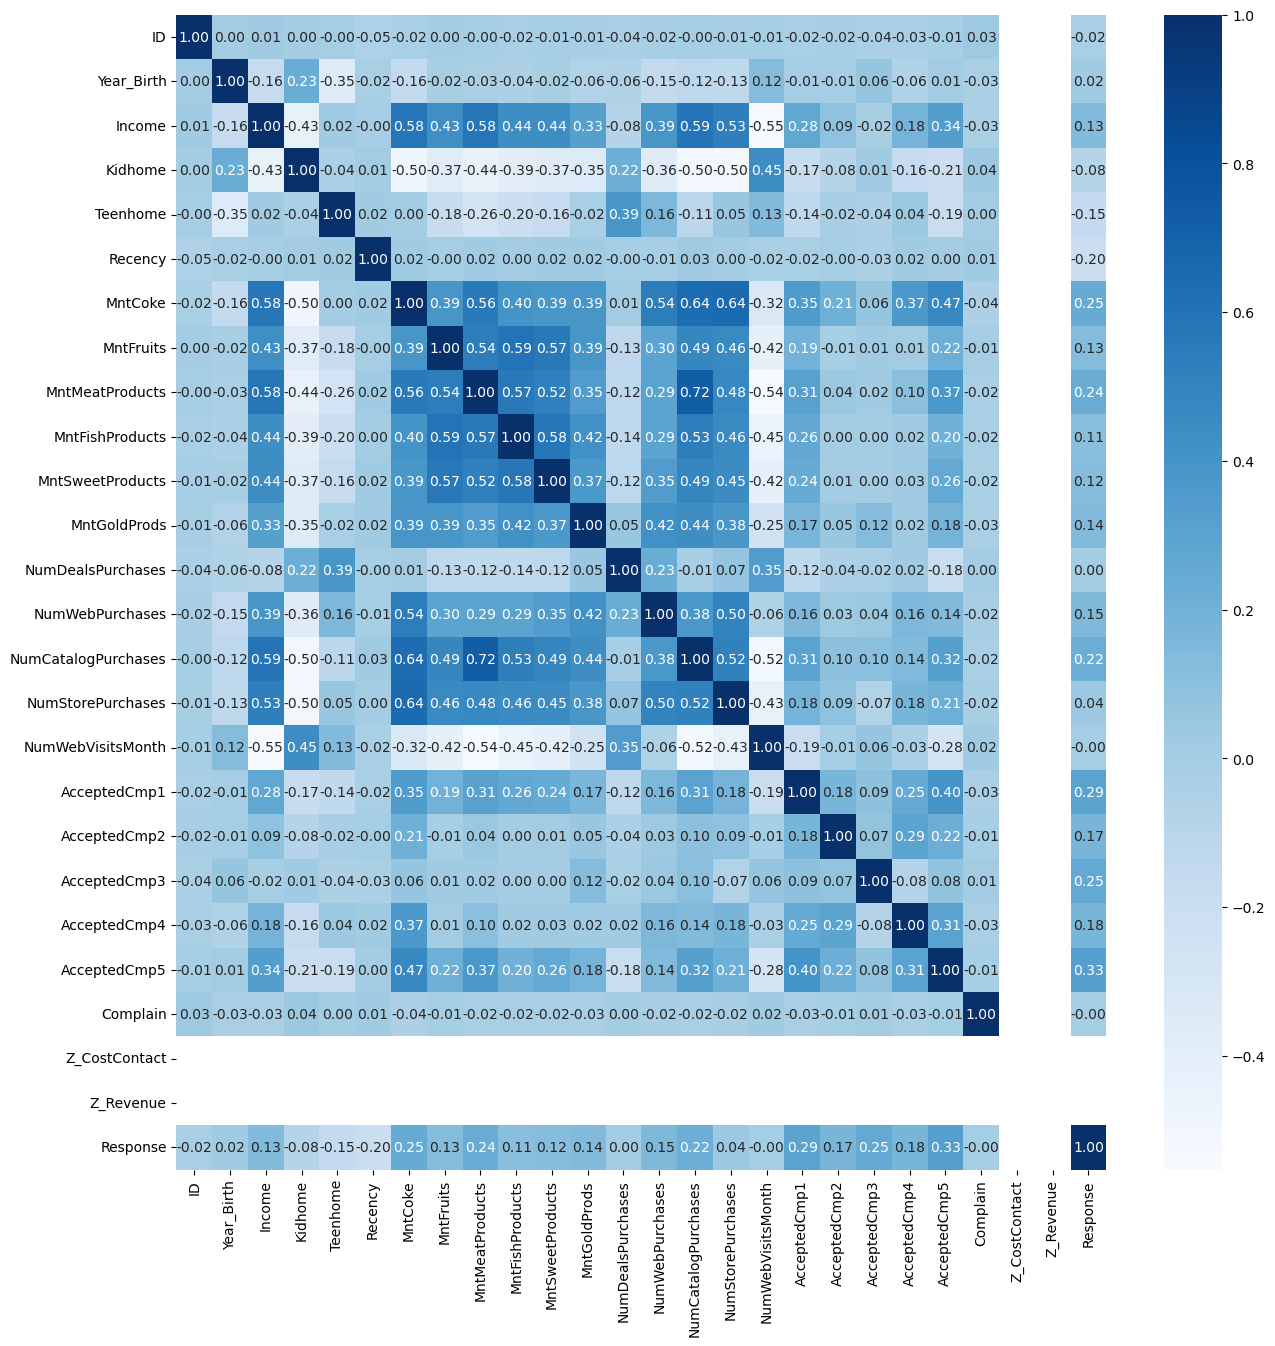

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

- Sejauh ini feature numeric dan categorical semua digunakan. Ada beberapa fitur yang berkorelasi negatif dengan target tapi secara intuition, fitur-fitur tersebut seharusnya mempunyai korelasi. Maka untuk sekarang tidak di drop dulu
- Column 'Response' merupakan target

In [12]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: count, dtype: int64

Value count kolom Marital_Status:
Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: count, dtype: int64

Value count kolom Dt_Customer:
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64



### Handling Data Redundant

a. Identifikasi fitur redundant:

- Numerical data: kolerasi no multicollinearity
- Categorical data: chi-square all significant kecuali housing x default

b. Feature selection/elimination

- drop Unnamed (done)

In [13]:
corr_matrix = df[nums].corr().abs() #-> ini biar kita hitung nilai korelasi tanpa perhatiin dia korelasi positif atau korelasi negatif

batas_atas = 0.9

col_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > batas_atas:
            colname = corr_matrix.columns[i]
            col_drop.add(colname)

df = df.drop(columns=col_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- tidak ada kolom redundant (no multicollinearity)

In [14]:
from scipy.stats import chi2_contingency

def run_chi_square_tests(df, significance_level=0.05):
    # Identify categorical columns
    cat_columns = df[cats].columns

    # Store results
    results = []

    # Iterate through all pairs of categorical columns
    for i in range(len(cat_columns)):
        for j in range(i+1, len(cat_columns)):
            col1, col2 = cat_columns[i], cat_columns[j]

            # Create contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])

            # Perform chi-square test
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            # Check significance
            is_significant = p_value < significance_level

            # Store results
            results.append({
                'Column 1': col1,
                'Column 2': col2,
                'Chi-square': chi2,
                'p-value': p_value,
                'DoF': dof,
                'Significant': is_significant
            })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df


# Run chi-square tests
results = run_chi_square_tests(df)
print(results)

         Column 1        Column 2   Chi-square       p-value   DoF  \
0       Education  Marital_Status    17.769624  6.025812e-01    20   
1       Education     Dt_Customer  3075.219813  1.131396e-08  2648   
2  Marital_Status     Dt_Customer  3349.332978  3.121704e-01  3310   

   Significant  
0        False  
1         True  
2        False  


In [15]:
# Education vs Response
Education_Response = pd.crosstab(df['Education'], df['Response'])
print("Education vs Response:\n", Education_Response)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(Education_Response)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)

Education vs Response:
 Response     0    1
Education          
D3         181   22
S1         975  152
S2         313   57
S3         385  101
SMA         52    2

Chi-square statistic: 23.0761
p-value: 0.0001
Degrees of freedom: 4

Expected frequencies:
[[172.73125     30.26875   ]
 [958.95625    168.04375   ]
 [314.83035714  55.16964286]
 [413.53392857  72.46607143]
 [ 45.94821429   8.05178571]]


In [16]:
# Marital_Status vs Response
Marital_Status_Response = pd.crosstab(df['Marital_Status'], df['Response'])
print("Marital_Status vs Response:\n", Marital_Status_Response)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(Marital_Status_Response)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(expected)

Marital_Status vs Response:
 Response          0    1
Marital_Status          
Bertunangan     520   60
Cerai           184   48
Duda              2    1
Janda            58   19
Lajang          376  108
Menikah         766   98

Chi-square statistic: 51.8049
p-value: 0.0000
Degrees of freedom: 5

Expected frequencies:
[[4.93517857e+02 8.64821429e+01]
 [1.97407143e+02 3.45928571e+01]
 [2.55267857e+00 4.47321429e-01]
 [6.55187500e+01 1.14812500e+01]
 [4.11832143e+02 7.21678571e+01]
 [7.35171429e+02 1.28828571e+02]]


- chi square signifikan terhadap response

### Handling missing values

- hanya kolom 'Income' yang perlu dilakukan handling missing values dengan median seperti dijelaskan diatas.
- kolom lain tidak mmepunya missing values, nilai NaN, atau unknown
- mengubah value yang menjadu outlier pada kolom 'Year_Birth', secara intuition hal ini tidak relevan.
- pengelompokan 'Age' menjadi

In [17]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [18]:
df['Year_Birth'] = df['Year_Birth'].replace([1893,1899,1900], df['Year_Birth'].mean())

### Feature engineering 

- membuat fitur baru conversion rate dengan formula 'response'/'visit'
- membuat fitur baru umur dari 'Year_Birth'
- membuat fitur baru untuk grouping umur
- membuat fitur baru menjumlahkan accepted campaign
- membuat fitur baru menjumlahkan anak
- membuat fitur baru menjumlahkan total transaksi
- membuat fitur baru menjumlahkan total belanja produk menjadi 'Spending'


In [19]:
df['Conversion_Rate'] = df['Response']/df['NumWebVisitsMonth']

In [20]:
df['Conversion_Rate'] = df['Conversion_Rate'].round(decimals=2)

In [21]:
df['Age'] = 2024 - df['Year_Birth']

In [22]:
df['Age'] = df['Age'].astype(int)
df['Age'].value_counts()

Age
48    89
53    87
49    83
52    79
46    77
54    77
59    74
51    74
55    74
50    69
68    55
66    53
45    53
72    52
47    52
56    51
65    51
58    50
70    50
69    49
64    49
42    45
61    45
57    44
62    44
67    43
73    43
41    42
38    42
60    42
44    39
43    39
40    38
63    36
71    35
39    32
35    30
75    30
74    29
36    29
37    27
76    21
34    18
78    16
77    16
33    15
32    13
79     8
81     7
80     7
31     5
29     5
30     3
28     2
83     1
84     1
Name: count, dtype: int64

In [23]:
def age_category(age):
    if age <= 16:
        return 'Minor'
    elif 17 <= age <= 23:
        return 'Young Adult 1'
    elif 24 <= age <= 30:
        return 'Young Adult 2'
    elif 31 <= age <= 39:
        return 'Middle Aged 1'
    elif 40 <= age <= 49:
        return 'Middle Aged 2'
    elif 50 <= age <= 59:
        return 'Middle Aged 3'
    else:
        return 'Senior Citizen'

df['Age_Category'] = df['Age'].apply(age_category)

In [24]:
df['Age_Category'].value_counts()

Age_Category
Senior Citizen    783
Middle Aged 3     679
Middle Aged 2     557
Middle Aged 1     211
Young Adult 2      10
Name: count, dtype: int64

In [25]:
df['AcceptedCmpTotal'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [26]:
df['AcceptedCmpTotal'].value_counts()

AcceptedCmpTotal
0    1777
1     325
2      83
3      44
4      11
Name: count, dtype: int64

In [27]:
df['NumPurchaseTotal'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [28]:
df['TotalChild'] = df['Kidhome'] + df['Teenhome']

In [29]:
df['NumSpendingTotal'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## EDA

In [31]:
plot_cats = ['Age_Category','Marital_Status','Education']
plot_nums = ['Income','Recency','NumSpendingTotal','NumPurchaseTotal','NumWebVisitsMonth','AcceptedCmpTotal','Complain']

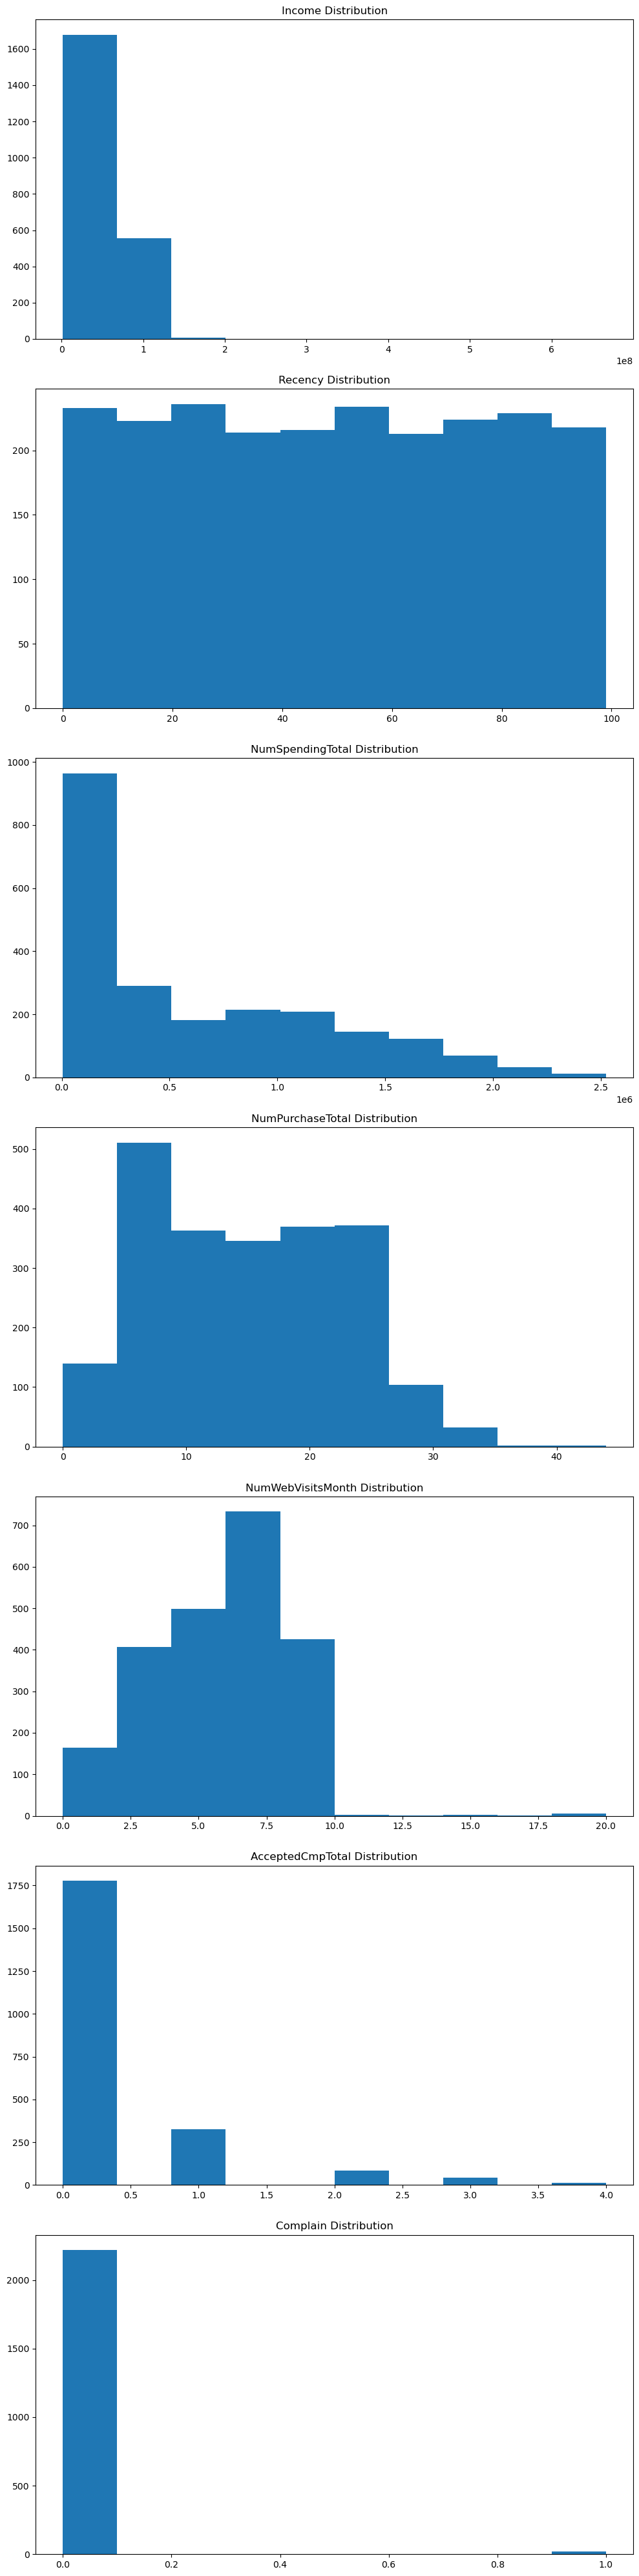

In [32]:
fig, axes = plt.subplots(len(plot_nums), 1, figsize=(10,40))
for i, feature in enumerate(plot_nums):
    axes[i].hist(df[feature])  # Access data by column name
    axes[i].set_title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

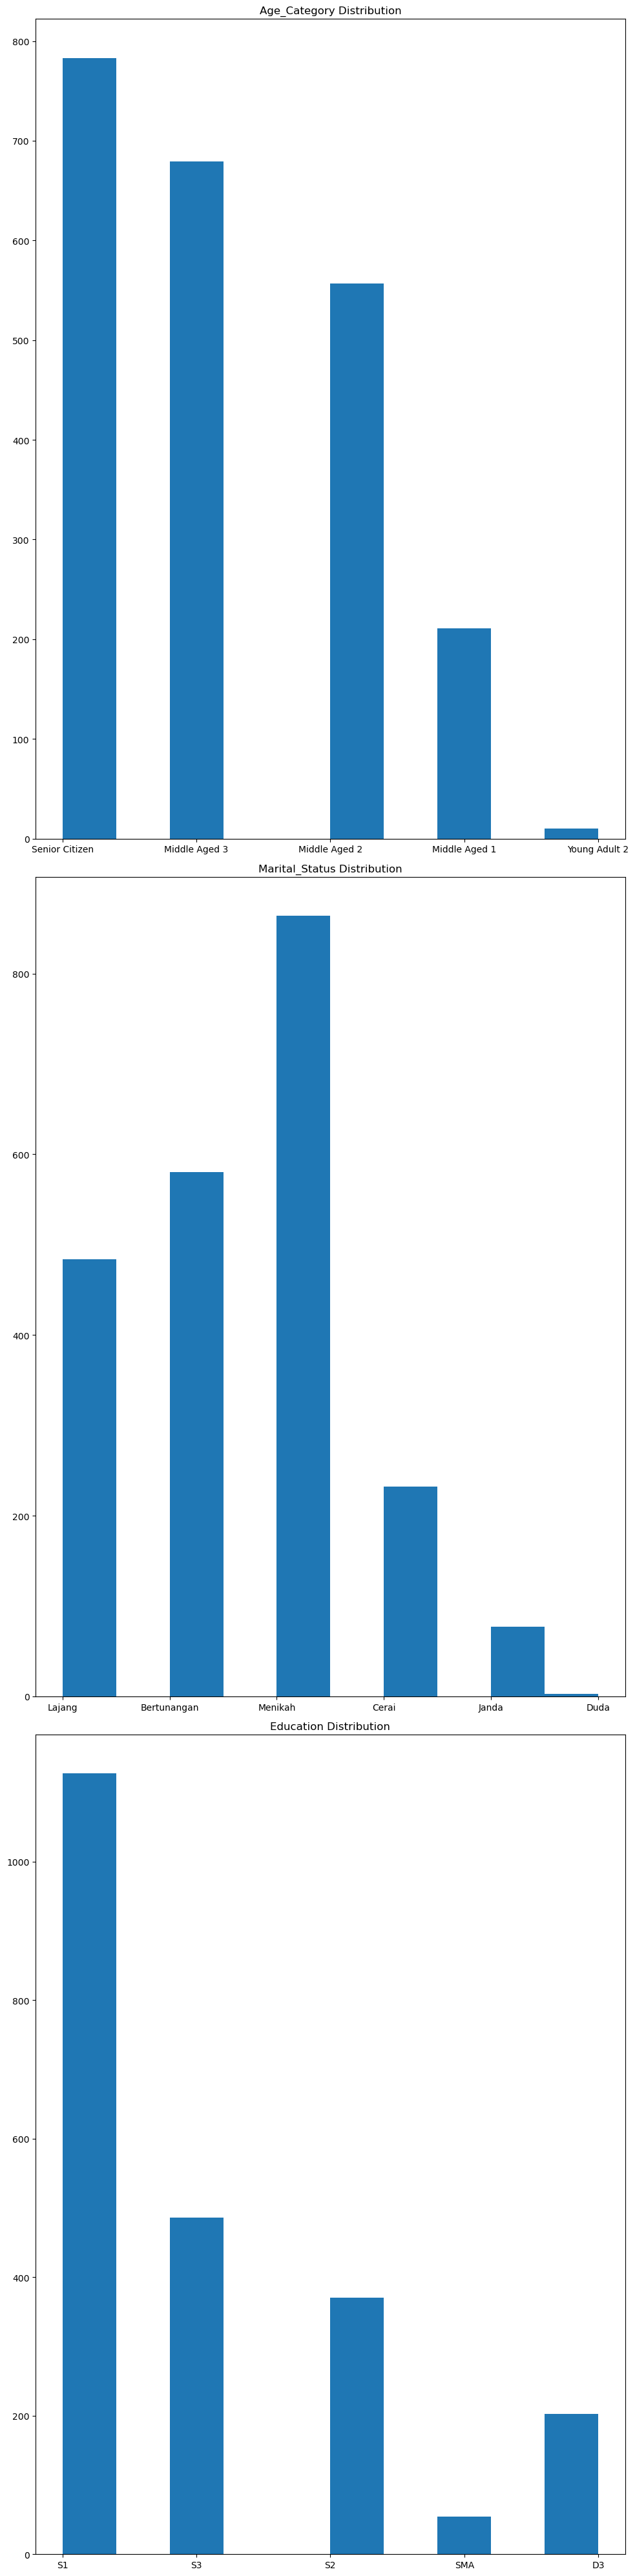

In [33]:
fig, axes = plt.subplots(len(plot_cats), 1, figsize=(10,40))
for i, feature in enumerate(plot_cats):
    axes[i].hist(df[feature])  # Access data by column name
    axes[i].set_title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

- most of the features are rightly skewed (negatively skewed) except recency and total number of purchase which looked relatively uniform.

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/2933871128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Conversion_Rate',


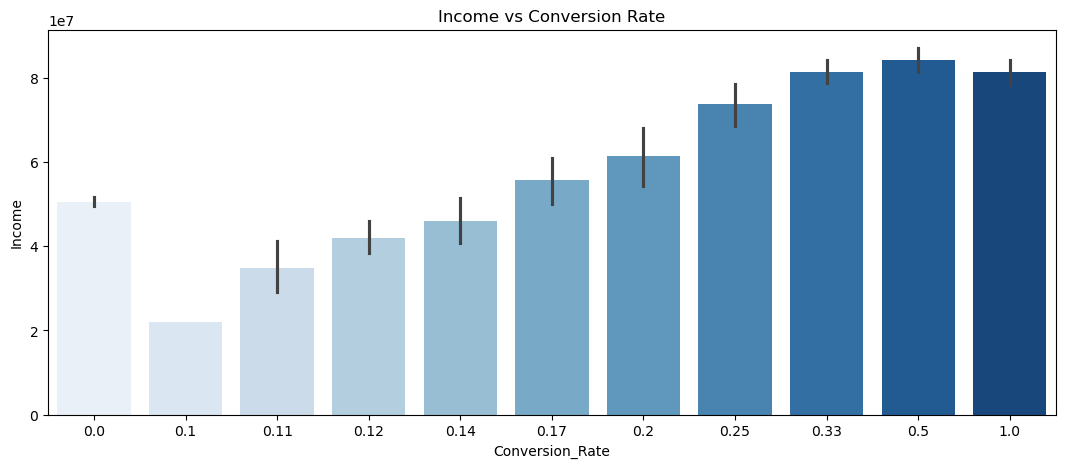

In [34]:
plt.figure(figsize=(13,5))
plt.title('Income vs Conversion Rate')
sns.barplot(x = 'Conversion_Rate',
            y = 'Income',
            palette ='Blues',
            data = df)
plt.show()

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/1823018057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Conversion_Rate',


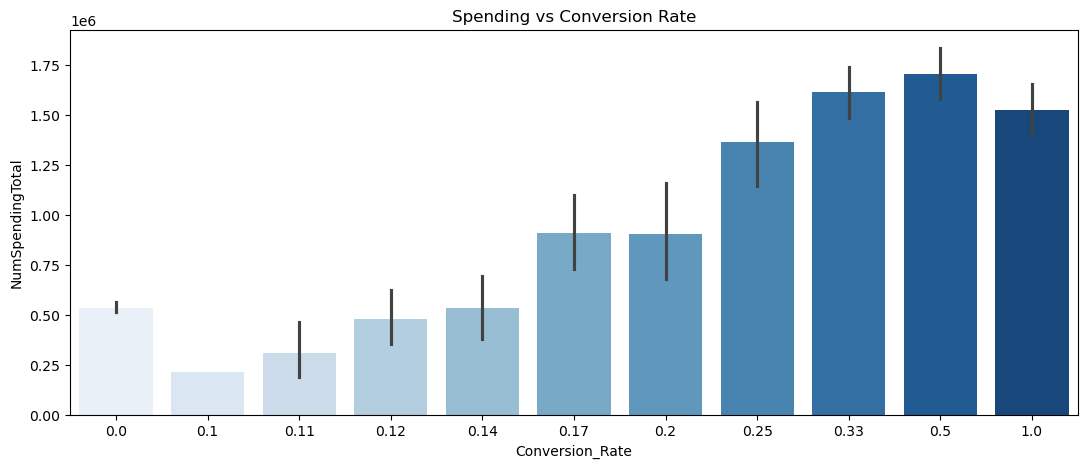

In [35]:
plt.figure(figsize=(13,5))
plt.title('Spending vs Conversion Rate')
sns.barplot(x = 'Conversion_Rate',
            y = 'NumSpendingTotal',
            palette ='Blues',
            data = df)
plt.show()

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/3820101152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Conversion_Rate',


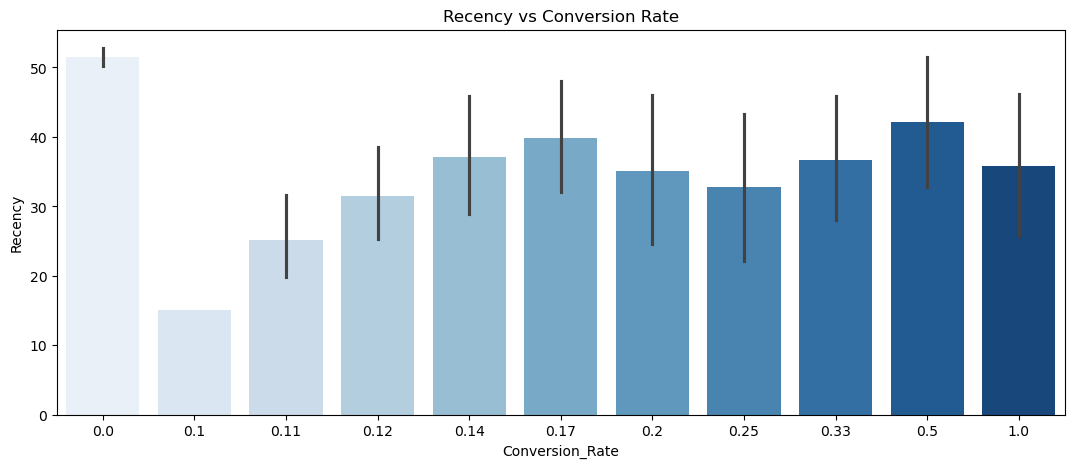

In [36]:
plt.figure(figsize=(13,5))
plt.title('Recency vs Conversion Rate')
sns.barplot(x = 'Conversion_Rate',
            y = 'Recency',
            palette ='Blues',
            data = df)
plt.show()

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/1002774037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Conversion_Rate',


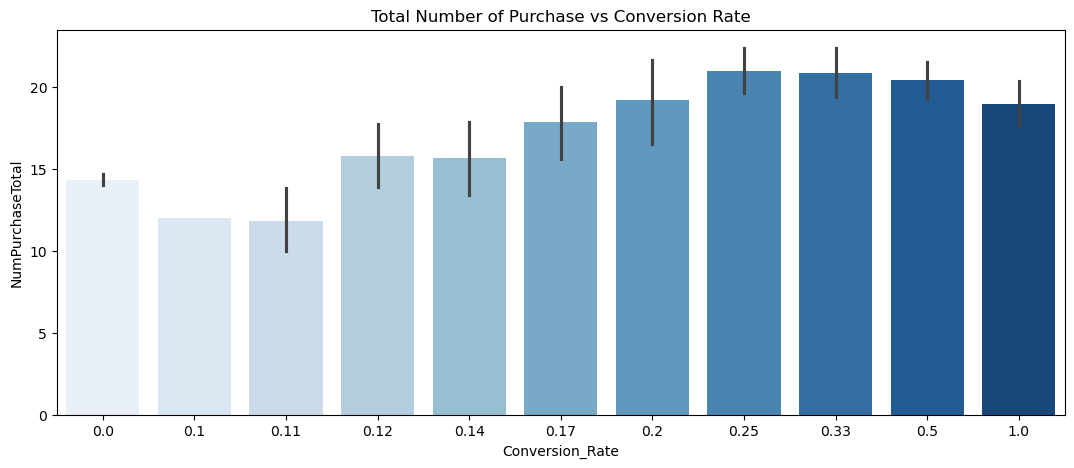

In [37]:
plt.figure(figsize=(13,5))
plt.title('Total Number of Purchase vs Conversion Rate')
sns.barplot(x = 'Conversion_Rate',
            y = 'NumPurchaseTotal',
            palette ='Blues',
            data = df)
plt.show()

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/1317673613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Conversion_Rate',


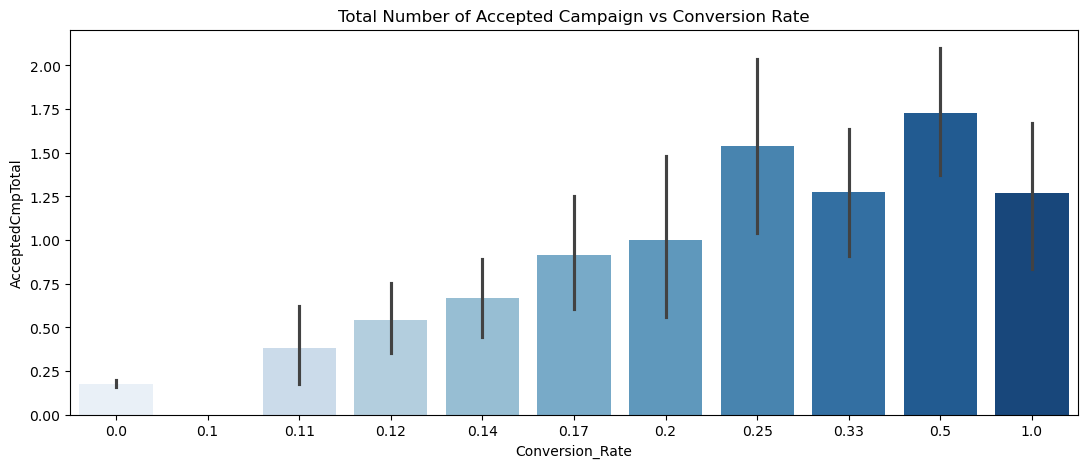

In [38]:
plt.figure(figsize=(13,5))
plt.title('Total Number of Accepted Campaign vs Conversion Rate')
sns.barplot(x = 'Conversion_Rate',
            y = 'AcceptedCmpTotal',
            palette ='Blues',
            data = df)
plt.show()

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/2910627868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Conversion_Rate',


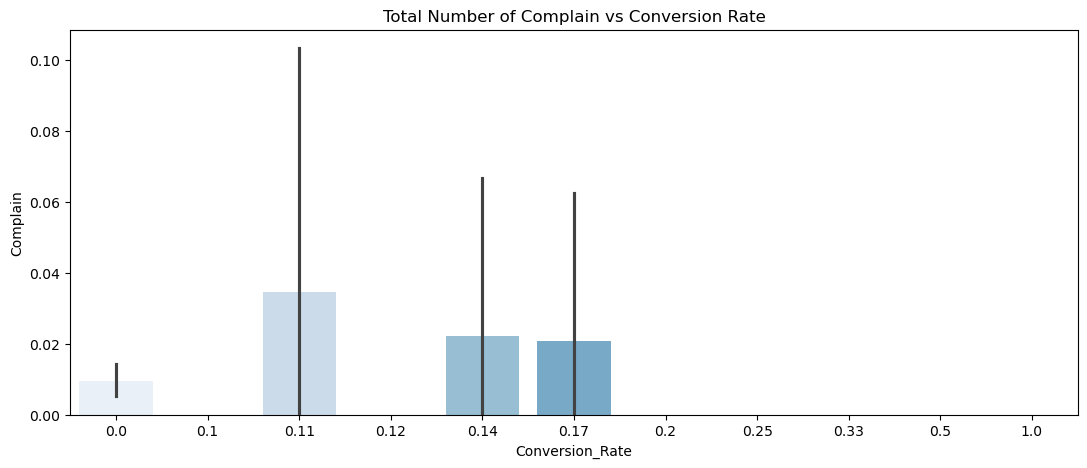

In [39]:
plt.figure(figsize=(13,5))
plt.title('Total Number of Complain vs Conversion Rate')
sns.barplot(x = 'Conversion_Rate',
            y = 'Complain',
            palette ='Blues',
            data = df)
plt.show()

- There's a slight positive trend, with income generally increasing as conversion rate increases. This implies that the higher the income, higher conversion rate is observed.
- In terms of recency, trend fluctuated across conversion rate. The sweet spot for higher conversion rates seems to be customers with moderate Recency values. This could imply that nurturing relationships over time, rather than focusing solely on the most recent or oldest customers, might be beneficial for improving conversion rates.
- In terms of total purchase, a plateau or slightly decrease for very high conversion rates (0.33 to 1.0) is observed despite steadily increasing. This could suggest that beyond a certain point, higher conversion rates don't necessarily lead to more total purchases. Maximum purchase is between 20-21 and minimum purchase is about 12.
- Similar to total purchase, total campaign increased steadily and fluctuate from 0.25 to 1. However, it can be concluded that higher accepted campaigns associated with higher conversion rate.
- There is a slight negative correlation between complain and conversion rate, suggesting that campaigns with higher conversion rates tend to have fewer complaints.

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/3425343735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Age_Category',


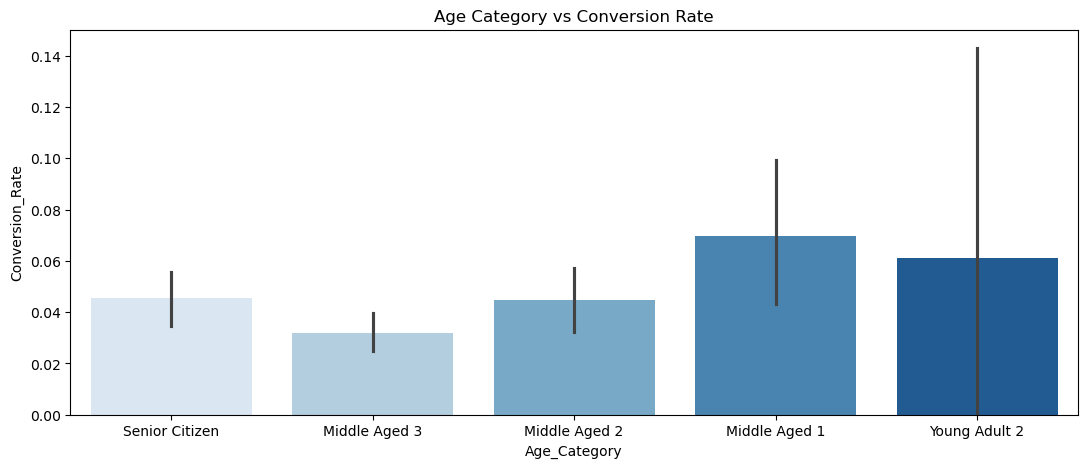

In [40]:
plt.figure(figsize=(13,5))
plt.title('Age Category vs Conversion Rate')
sns.barplot(x = 'Age_Category',
            y = 'Conversion_Rate',
            palette ='Blues',
            data = df)
plt.show()

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/3803006069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Marital_Status',


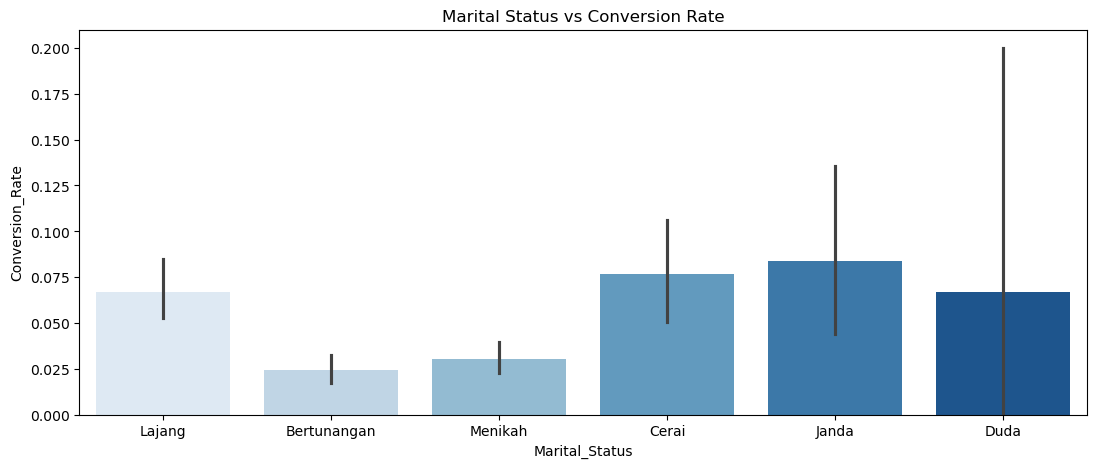

In [41]:
plt.figure(figsize=(13,5))
plt.title('Marital Status vs Conversion Rate')
sns.barplot(x = 'Marital_Status',
            y = 'Conversion_Rate',
            palette ='Blues',
            data = df)
plt.show()

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/2764873510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Education',


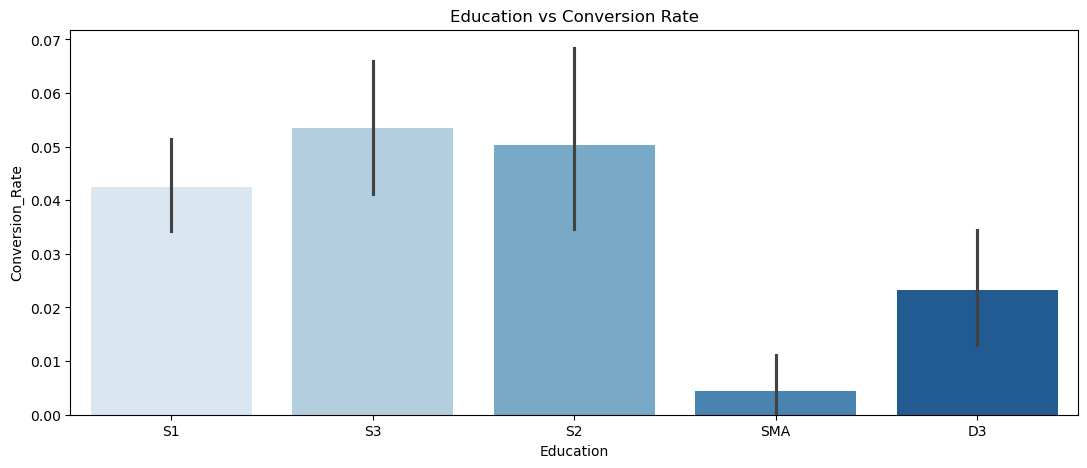

In [42]:
plt.figure(figsize=(13,5))
plt.title('Education vs Conversion Rate')
sns.barplot(x = 'Education',
            y = 'Conversion_Rate',
            palette ='Blues',
            data = df)
plt.show()

- The middle-aged groups, particularly Middle Aged 1, have the highest conversion rates, while Senior Citizen and Middle Aged 3 have the lowest. The younger customers are, the higher the conversion rate.
- In terms of relationship between marital status and conversion rate. The highest conversion rates are observed among those who are married and widowed, while the lowest rates are seen among the single and divorced individuals. However, there is significant overlap among the groups, suggesting that marital status alone may not be the sole determinant of conversion rate.
- In terms of relationship between education level and conversion rate. The highest conversion rates are observed among individuals with S1 and S3 education levels, while the lowest rates are seen among those with SMA and D3 education levels. However, there is significant overlap among the groups, suggesting that education level alone may not be the sole determinant of conversion rate. Alas, those who are having tertiary education are more likely to convert. 



## Data Cleaning & Preprocessing

- Pada tahap cleaning data, tunjukan null atau missing value serta duplicated value pada dataset, serta cara penyelesaiannya.

- Selanjutnya untuk data preprocessing, tunjukan bahwa data sudah dilakukan proses feature encoding dan feature standardisation.

In [43]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Conversion_Rate        11
Age                     0
Age_Category            0
AcceptedCmpTotal        0
NumPurchaseTotal        0
TotalChild              0
NumSpendingTotal        0
dtype: int64

- Before executing EDA, some missing values had been addressed as such 'Year_Birth' and 'Income'
- After thorough checking, 'Conversion_Rate' seemed to have 11 missing values as the calculation was supposed to be 0. Hence, filling in missing values with 0 is done.

In [44]:
rows_with_na = df[df['Conversion_Rate'].isna()]
print(rows_with_na)

         ID  Year_Birth Education Marital_Status       Income  Kidhome  \
164    8475      1973.0        S3        Menikah  157243000.0        0   
655    5555      1975.0        S1          Cerai  153924000.0        0   
687    1501      1982.0        S3        Menikah  160803000.0        0   
905   11074      1977.0        S1         Lajang   85072000.0        0   
975   10286      1962.0        S1        Menikah   83715000.0        0   
1773   8584      1952.0        S3    Bertunangan   85431000.0        0   
1806   6237      1966.0        S3         Lajang    7144000.0        0   
1910   5832      1960.0        D3    Bertunangan   92556000.0        0   
1955   6428      1950.0        S3          Janda   76842000.0        0   
2132  11181      1949.0        S3        Menikah  156924000.0        0   
2228   8720      1978.0        D3    Bertunangan   51381500.0        0   

      Teenhome Dt_Customer  Recency  MntCoke  ...  Z_CostContact  Z_Revenue  \
164          1  01-03-2014      

In [45]:
df['Conversion_Rate'] = df['Conversion_Rate'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [46]:
duplicate_row = df[df.duplicated(keep=False)]
duplicate_row

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Z_CostContact,Z_Revenue,Response,Conversion_Rate,Age,Age_Category,AcceptedCmpTotal,NumPurchaseTotal,TotalChild,NumSpendingTotal


- When checking for duplicates, no duplicates detected as shown above
- As some new features are made, those features that wont be used for machine learning will be drop and only features below are retained:
    - NumSpendingTotal
    - TotalChild
    - NumPurchaseTotal
    - AcceptedCmpTotal
    - NumWebVisitsMonth
    - Age_Category
    - Conversion Rate
    - Complain
    - Recency
    - Education
    - Marital_Status
    - Income
    - Response (target variable)


In [47]:
df_filtered = df.drop(['ID', 'Year_Birth','Kidhome','Teenhome','Dt_Customer','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','AcceptedCmp4','AcceptedCmp5','Z_CostContact','Z_Revenue','Age'], axis=1)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Recency            2240 non-null   int64  
 4   NumWebVisitsMonth  2240 non-null   int64  
 5   Complain           2240 non-null   int64  
 6   Response           2240 non-null   int64  
 7   Conversion_Rate    2240 non-null   float64
 8   Age_Category       2240 non-null   object 
 9   AcceptedCmpTotal   2240 non-null   int64  
 10  NumPurchaseTotal   2240 non-null   int64  
 11  TotalChild         2240 non-null   int64  
 12  NumSpendingTotal   2240 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 227.6+ KB


- all columns that are not going to be used has been dropped.
- next step is to encode categorical features
    - Label encoding for ordinal data (Education, Age_Category)
    - One hot encoding for non-ordinal data (Marital_Status)

In [48]:
df_filtered['Age_Category'] = df_filtered['Age_Category'].replace({'Minor': 0, 'Young Adult 1': 1, 'Young Adult 2': 2, 'Middle Aged 1': 3, 'Middle Aged 2': 4, 'Middle Aged 3': 5, 'Senior Citizen': 6 }).astype(int)
df_filtered['Education'] = df_filtered['Education'].replace({'S3': 4, 'S2': 3, 'S1': 2, 'D3': 1, 'SMA' : 0}).astype(int)

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/2099925103.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered['Age_Category'] = df_filtered['Age_Category'].replace({'Minor': 0, 'Young Adult 1': 1, 'Young Adult 2': 2, 'Middle Aged 1': 3, 'Middle Aged 2': 4, 'Middle Aged 3': 5, 'Senior Citizen': 6 }).astype(int)
/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_8873/2099925103.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered['Education'] = df_filtered['Education'].replace({'S3': 4

In [49]:
df_filtered = pd.get_dummies(df_filtered, columns=['Marital_Status'], dtype = int)

In [50]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Education                   2240 non-null   int64  
 1   Income                      2240 non-null   float64
 2   Recency                     2240 non-null   int64  
 3   NumWebVisitsMonth           2240 non-null   int64  
 4   Complain                    2240 non-null   int64  
 5   Response                    2240 non-null   int64  
 6   Conversion_Rate             2240 non-null   float64
 7   Age_Category                2240 non-null   int64  
 8   AcceptedCmpTotal            2240 non-null   int64  
 9   NumPurchaseTotal            2240 non-null   int64  
 10  TotalChild                  2240 non-null   int64  
 11  NumSpendingTotal            2240 non-null   int64  
 12  Marital_Status_Bertunangan  2240 non-null   int64  
 13  Marital_Status_Cerai        2240 

- all feature enconding has been done
- next step is to standardise values, check for features that needed standardisation
    - features were not encoded before
    - different scales with other features

In [51]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_filtered['Income'] = ss.fit_transform(df_filtered[['Income']])
df_filtered['Recency'] = ss.fit_transform(df_filtered[['Recency']])
df_filtered['NumWebVisitsMonth'] = ss.fit_transform(df_filtered[['NumWebVisitsMonth']])
df_filtered['NumPurchaseTotal'] = ss.fit_transform (df_filtered[['NumPurchaseTotal']])
df_filtered['NumSpendingTotal'] = ss.fit_transform (df_filtered[['NumSpendingTotal']])

In [52]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Education                   2240 non-null   int64  
 1   Income                      2240 non-null   float64
 2   Recency                     2240 non-null   float64
 3   NumWebVisitsMonth           2240 non-null   float64
 4   Complain                    2240 non-null   int64  
 5   Response                    2240 non-null   int64  
 6   Conversion_Rate             2240 non-null   float64
 7   Age_Category                2240 non-null   int64  
 8   AcceptedCmpTotal            2240 non-null   int64  
 9   NumPurchaseTotal            2240 non-null   float64
 10  TotalChild                  2240 non-null   int64  
 11  NumSpendingTotal            2240 non-null   float64
 12  Marital_Status_Bertunangan  2240 non-null   int64  
 13  Marital_Status_Cerai        2240 

In [53]:
df_filtered.describe()

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,Conversion_Rate,Age_Category,AcceptedCmpTotal,NumPurchaseTotal,TotalChild,NumSpendingTotal,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah
count,2240.000000,2.240000e+03,2.240000e+03,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.460268,-1.300547e-16,-3.172066e-18,-6.344132e-17,0.009375,0.149107,0.043295,4.899107,0.297768,-1.110223e-17,0.950446,-6.502735e-17,0.258929,0.103571,0.001339,0.034375,0.216071,0.385714
std,1.004337,1.000223e+00,1.000223e+00,1.000223e+00,0.096391,0.356274,0.142508,1.002720,0.678381,1.000223e+00,0.751803,1.000223e+00,0.438144,0.304772,0.036580,0.182231,0.411655,0.486872
min,0.000000,-2.017707e+00,-1.696001e+00,-2.191381e+00,0.000000,0.000000,0.000000,2.000000,0.000000,-1.936308e+00,0.000000,-9.978133e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-6.671053e-01,-8.671566e-01,-9.548307e-01,0.000000,0.000000,0.000000,4.000000,0.000000,-8.940252e-01,0.000000,-8.919365e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,-3.421472e-02,-3.777284e-03,2.817201e-01,0.000000,0.000000,0.000000,5.000000,0.000000,1.797240e-02,1.000000,-3.484355e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,6.412408e-01,8.596020e-01,6.939037e-01,0.000000,0.000000,0.000000,6.000000,0.000000,7.996846e-01,1.000000,7.302623e-01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.000000,2.454534e+01,1.722981e+00,6.052291e+00,1.000000,1.000000,1.000000,6.000000,4.000000,3.796248e+00,3.000000,3.187435e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- handling outliers were not performed as a number of significant data would be lost, to be noted as well that the instruction did not tell to do so.

## Data Modelling

- Melihat jumlah cluster yang tepat dengan menggunakan elbow method
- Melakukan implementasi clustering dengan menggunakan k-means clustering
- Menghitung sillhouette score melihat bagaimana performa model yang didapat

In [58]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_filtered.values)
    inertia.append(kmeans.inertia_)

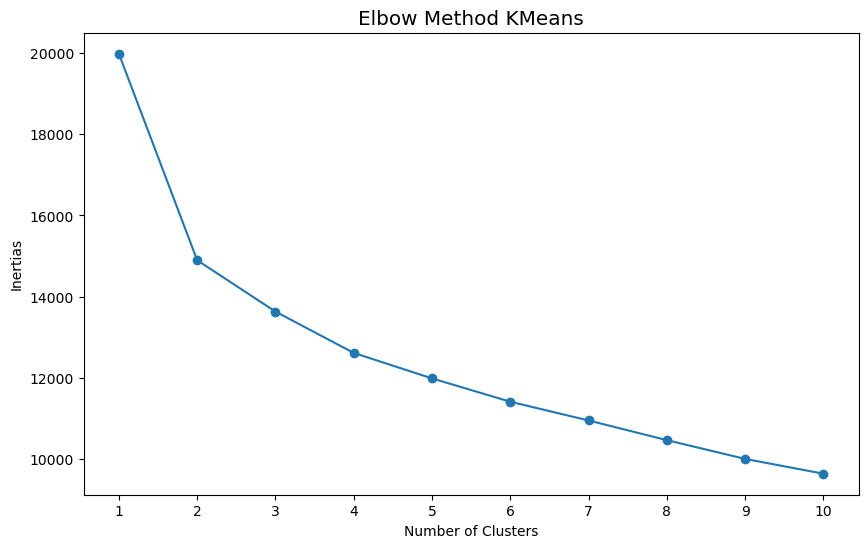

In [59]:
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.xticks(range(1, 11))
plt.style.use('ggplot')
plt.title('Elbow Method KMeans')
plt.show()

In [60]:
pd.Series(inertia) - pd.Series(inertia).shift(-1)

0    5085.083127
1    1265.713722
2    1017.344492
3     627.259852
4     575.144725
5     461.160959
6     484.931421
7     461.497115
8     364.992917
9            NaN
dtype: float64

- From the elbow method, the best cluster is 3. Although some confusion with 4 clusters, the difference between 3 to 4 is smaller rather than 4 to 5. However, keeping in mind 4 clusters to be check for modelling is cautious. 

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_filtered)
df_filtered['km_labels'] = kmeans.labels_

[]

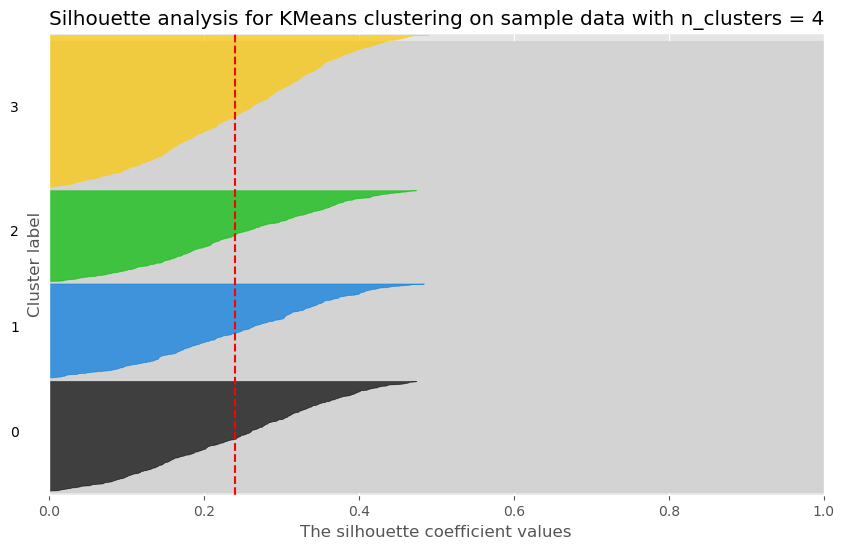

In [69]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Get the numerical columns
numerical_cols = df_filtered.select_dtypes(include=['float', 'int']).columns

# Calculate the silhouette scores for each sample
cluster_labels = df_filtered['km_labels'] # Replace with your cluster labels
n_clusters = len(np.unique(cluster_labels))  # Number of clusters
silhouette_values = silhouette_samples(df_filtered[numerical_cols].values, cluster_labels)

# Create the silhouette plot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
y_lower = 10

# Plot the silhouette values
ax1.set_xlim([0, 1])
ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
y_upper = y_lower + len(cluster_labels)
cluster_silhouette_values = silhouette_values.copy()
cluster_silhouette_values.sort()
y_ax_upper = len(cluster_labels) + (n_clusters + 1) * 10
rect = plt.Rectangle((0, y_lower), 1, y_upper - y_lower, edgecolor='none', facecolor='lightgray')
ax1.add_patch(rect)

for i in range(n_clusters):
    cluster_values = cluster_silhouette_values[cluster_labels == i]
    cluster_values.sort()
    size_cluster_i = cluster_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters)
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_score(df_filtered[numerical_cols].values, cluster_labels), color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks

In [ ]:
# Plot the clustered data in a separate figure
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 6))
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(df_filtered[numerical_cols[6]], df_filtered[numerical_cols[1]], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("feature space for the 1st feature")
ax2.set_ylabel("feature space for the 2nd feature")

plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

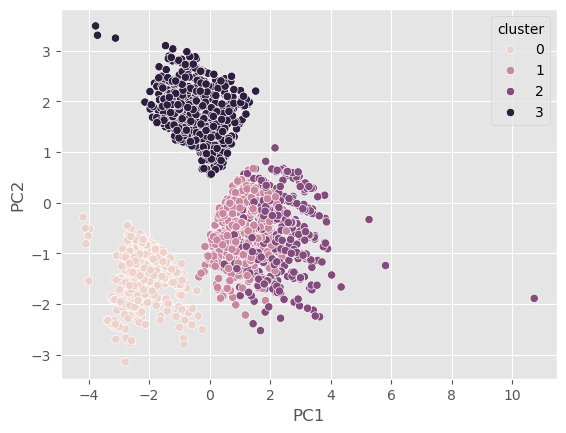

In [71]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(df_filtered),columns=['PC1','PC2'])
pca_data['cluster'] = df_filtered['km_labels']
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [76]:
cluster_stats = df_filtered.groupby('km_labels').mean()
print(cluster_stats)

           Education    Income   Recency  NumWebVisitsMonth  Complain  \
km_labels                                                               
0           1.741877 -0.868149 -0.013814           0.627687  0.014440   
1           2.535865  0.494946 -0.063012          -0.121768  0.008439   
2           2.537611  1.135807  0.062084          -1.256673  0.006637   
3           2.890789 -0.351361  0.012445           0.365784  0.007895   

           Response  Conversion_Rate  Age_Category  AcceptedCmpTotal  \
km_labels                                                              
0          0.102888         0.013863      4.001805          0.090253   
1          0.132911         0.022447      5.265823          0.267932   
2          0.311947         0.151991      4.774336          0.891593   
3          0.096053         0.013105      5.398684          0.114474   

           NumPurchaseTotal  TotalChild  NumSpendingTotal  \
km_labels                                                   
0     

- Based on modelling, a number of 4 clusters is selected rather than 3:
    - It has a slightly better silhouette score, indicating better-defined clusters.
    - The PCA visualization strongly supports the existence of 4 distinct groups.
    - It likely provides a more detailed and accurate representation of the data's underlying structure.